<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">CREDIT CARD DEFAULT PREDICTION </h1>
     

**Problem Statement**
Credit card default happens when clients fail to adhere to the credit card agreement,by not paying monthly bill.Credit risk plays a major role in the banking industry business. Banks’ main activities involve granting loan, credit card, investment, mortgage, and others. Credit card has been one of the most booming financial services by banks over the past years

**Dataset Information**
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005

**Content of Data**


ID: ID of each client
    
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
                                                 
SEX: Gender (1=male, 2=female)
                                                 
EDUCATION: (0=?, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
                                                 
MARRIAGE: Marital status (0=?,1=married, 2=single, 3=others)
                                                 
AGE: Age in years
                                                 
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
                                                 
PAY_2: Repayment status in August, 2005 (scale same as above)
                                                 
PAY_3: Repayment status in July, 2005 (scale same as above)
                                                 
PAY_4: Repayment status in June, 2005 (scale same as above)
                                                 
PAY_5: Repayment status in May, 2005 (scale same as above)
                                                 
PAY_6: Repayment status in April, 2005 (scale same as above)
                                                 
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
                                                 
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
                                                 
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
                                                 
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
                                                 
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
                                                 
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
                                                 
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
                                                 
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
                                                 
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
                                                 
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
                                                 
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
                                                 
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
                                                 
default.payment.next.month: Default payment (1=yes, 0=no)

># IMPORTING LIBRALIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

># READING AND UNDERSTANDING DATA SET

In [3]:
input_path = "/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv"

In [4]:
# Reading the dataframe

df = pd.read_csv(input_path)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.shape

(30000, 25)

**Interpretation:** The data set contains 25 variables and 30000 rows

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**Interpretation:**

No null/missing values are present in the data set.Thus no imputation is required.

### CHECKING DISTRIBUTION OF TARGET VARIABLE

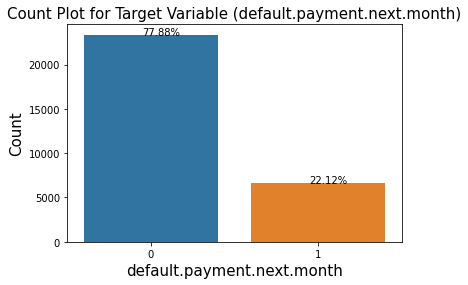

In [7]:
# consider only the target variable
df_target = df['default.payment.next.month'].copy()

df_target.value_counts()

sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (default.payment.next.month)', fontsize = 15)
plt.xlabel('default.payment.next.month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

**Interpretation**

As we can see Data is `Imbalanced`.

77.88 percent people are not likely to default where as 22.12 percent of people are likely to refault in credit card bill payment

># DATA PREPROCESSING

The column ID contains the ID's of the student, which is redundant for further analysis. Thus, we drop the column.

In [8]:
df.drop(['ID'], axis = 1, inplace = True )

Documenting undocumented variables on the basis of findings

In [9]:
df['SEX'].unique()

array([2, 1])

In [10]:
# SEX - 1 : Male, 2: Female. Converting into binary 0: Male, 1: Female
df['SEX'] = df['SEX'].map({1:0, 2:1})

In [11]:
# Education: 1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others
# So encoding 0,4,5,6 into 0
df['EDUCATION'].replace([4,5,6], [0,0,0], inplace = True)

In [12]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [13]:
# Marriage 1- single, 2 - Married, 3 - Divorced, 0-others
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [14]:
# Repayment status
#-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month;
# 2 = payment delay for two months; . . .;b
# 8 = payment delay for eight months; 9 = payment delay for nine months and above.

df.groupby('PAY_0')['default.payment.next.month'].value_counts(normalize = True)

PAY_0  default.payment.next.month
-2     0                             0.867706
       1                             0.132294
-1     0                             0.832219
       1                             0.167781
 0     0                             0.871887
       1                             0.128113
 1     0                             0.660521
       1                             0.339479
 2     1                             0.691414
       0                             0.308586
 3     1                             0.757764
       0                             0.242236
 4     1                             0.684211
       0                             0.315789
 5     0                             0.500000
       1                             0.500000
 6     1                             0.545455
       0                             0.454545
 7     1                             0.777778
       0                             0.222222
 8     1                             0.578947


Data cleaning and transformation is required for this data. Plus as the data is imbalanced, we also have to fix that so model has enough samples to learn from the data.

We will be choosing F1-score as our metric to validate the model.

**Interpretation:**

The following columns are quantitative/numerical: 'LIMIT_BAl' , 'AGE' , 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'.
    
    

The following columns are quantitative/categorical: 'SEX', 'EDUCATION', 'MARRIAGE' ,'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month'

In [15]:
num_variables = ['LIMIT_BAL', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'AGE']
cat_variables = [i for i in df.columns if i not in num_variables]

In [16]:
cat_variables.remove('default.payment.next.month')

In [17]:
cat_variables.remove('SEX')

In [18]:
for i in cat_variables:
    df[i] = df[i].astype(str)

We will one hot encode the foll variables: Pay_0 to Pay_6, SEX, MARRIAGE, EDUCATION.

In [19]:
X = df.drop(['default.payment.next.month'],axis = 1)
y = df['default.payment.next.month']
y=y.astype('int')

# Spliting the var into 85-15 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state = 100)

In [20]:
from sklearn.preprocessing import OneHotEncoder
X_train_cat = X_train[cat_variables]
X_test_cat = X_test[cat_variables]

ohe = OneHotEncoder(sparse=False, drop='first')
train_cat_vals = ohe.fit_transform(X_train_cat)
test_cat_vals = ohe.transform(X_test_cat)

tr_cat_df = pd.DataFrame(train_cat_vals, columns=ohe.get_feature_names(input_features=X_train_cat.columns))
te_cat_df = pd.DataFrame(test_cat_vals, columns=ohe.get_feature_names(input_features=X_test_cat.columns))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
X_train.reset_index(drop=True, inplace= True)
X_test.reset_index(drop=True, inplace = True)

In [22]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,110000.0,1,3,2,28,0,0,2,2,0,...,82975.0,80446.0,80006.0,80421.0,4000.0,6000.0,12.0,3100.0,3200.0,3000.0
1,50000.0,1,2,2,40,-1,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,4377.0,0.0,0.0,0.0,0.0,0.0
2,320000.0,1,1,1,39,0,0,0,0,0,...,128832.0,133329.0,53870.0,13185.0,5000.0,15000.0,5000.0,5000.0,3000.0,5000.0
3,200000.0,1,1,2,28,1,-1,3,2,2,...,344.0,344.0,0.0,0.0,344.0,0.0,0.0,0.0,0.0,250.0
4,320000.0,1,2,1,40,0,0,0,0,0,...,100704.0,208794.0,213025.0,217400.0,5000.0,2704.0,108794.0,5123.0,5255.0,5333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25495,180000.0,0,2,2,38,2,2,0,0,0,...,22182.0,12382.0,-18.0,-18.0,0.0,2100.0,200.0,0.0,0.0,0.0
25496,150000.0,1,1,1,34,-2,-2,-2,-2,-2,...,8796.0,20359.0,17329.0,20087.0,14539.0,8796.0,20375.0,17329.0,20087.0,0.0
25497,300000.0,0,1,2,29,-2,-2,-2,-2,-2,...,1705.0,-4.0,36581.0,332.0,4018.0,1809.0,0.0,36583.0,334.0,0.0
25498,20000.0,0,1,2,28,1,2,0,0,2,...,9097.0,10935.0,10463.0,11295.0,0.0,1200.0,2000.0,0.0,1000.0,0.0


In [23]:
X_train.drop(cat_variables, axis = 1, inplace = True)
X_test.drop(cat_variables, axis = 1, inplace = True)

X_train = pd.concat([X_train, tr_cat_df], axis = 1)
X_test = pd.concat([X_test, te_cat_df], axis = 1)

In [24]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_0_-2', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4',
       'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_0',
       'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7',
       'PAY_5_8', 'PAY_6_-2', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4',
       'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_

Now we will fit 4 models to this data: Logistic regression, Decision Trees, K Nearest neighbors and Support Vector machines.

We will treat Logistic regression as the base model

># Base Model

In [25]:
from sklearn.metrics import accuracy_score, classification_report 
def print_metrics(model):
    """This function will print the train and test accuracy, and the Test classification report"""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('Train Accuracy = ', accuracy_score(y_train, y_train_pred))
    print('Test Accuracy = ', accuracy_score(y_test, y_test_pred))
    print()
    print('Test classification Report: ')
    print()
    print(classification_report(y_test, y_test_pred))

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000, class_weight='balanced')
lr.fit(X_train, y_train)
print_metrics(lr)

Train Accuracy =  0.5547058823529412
Test Accuracy =  0.5628888888888889

Test classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.52      0.65      3505
           1       0.30      0.72      0.42       995

    accuracy                           0.56      4500
   macro avg       0.58      0.62      0.54      4500
weighted avg       0.74      0.56      0.60      4500



The model is not predicting the minority class since the data is imbalanced. So we will pass in class_weight parameter to the model, so the model starts treating the minority class as important.

As we see, the f1-score for the minority class jumps to 0.42. So balancing the classes had major effect on the model performance

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train, y_train)
print_metrics(dtc)

Train Accuracy =  0.9993333333333333
Test Accuracy =  0.7424444444444445

Test classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3505
           1       0.42      0.43      0.43       995

    accuracy                           0.74      4500
   macro avg       0.63      0.63      0.63      4500
weighted avg       0.75      0.74      0.74      4500



Decision Tree is overfitting, restricting the maximum depth tree can grow to 5

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced', max_depth=6)
dtc.fit(X_train, y_train)
print_metrics(dtc)

Train Accuracy =  0.7884705882352941
Test Accuracy =  0.7922222222222223

Test classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3505
           1       0.53      0.52      0.53       995

    accuracy                           0.79      4500
   macro avg       0.70      0.70      0.70      4500
weighted avg       0.79      0.79      0.79      4500



In [29]:
# Support Vector machines
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')
svc.fit(X_train, y_train)
print_metrics(svc)

Train Accuracy =  0.5845098039215686
Test Accuracy =  0.5731111111111111

Test classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.55      0.67      3505
           1       0.29      0.64      0.40       995

    accuracy                           0.57      4500
   macro avg       0.57      0.60      0.53      4500
weighted avg       0.72      0.57      0.61      4500



In [30]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)
print_metrics(knc)

Train Accuracy =  0.8172941176470588
Test Accuracy =  0.7568888888888889

Test classification Report: 

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3505
           1       0.40      0.19      0.26       995

    accuracy                           0.76      4500
   macro avg       0.60      0.55      0.56      4500
weighted avg       0.71      0.76      0.72      4500



Observations:

1. Class imbalance has a major effect on the model performance. Giving weight to minority class improved the performance considerably

2. Distance based models (KNN and SVM) didn't give good results on this dataset. That might be because of high dimensionality and outliers present in the data

3. Decision Tree gave the best result with minority class f1-score at 0.53

># Model Training - Iteration 2

As we saw in the EDA, many of the numeric variables have skew/ are not normally distributed.

While the distribution of the data is not an issue (generally) for tree based algorithms, for statistical algos like Logistic regression perform much better with normal data. So we will be applying various transformations to check how the model behaves for each one

Also for handling the outliers, data transformation is necessary. What data transformation should do is reduce the variance in the numeric data and thus removing the negative effect of outliers

In [31]:
# Transformations : 
### Age:

def plot_transformations(variable):
    plt.figure(figsize = (15,10))
    sns.displot(df[variable])
    try:
        log_trans = np.log(df[variable]+1)
        sns.displot(log_trans)
    except:
        print('Log transformation not applicable since there are negative values present in data')
    sqrt_trans = np.sqrt(df[variable])
    sns.displot(sqrt_trans)
    
    try:
        boxcox_trans = boxcox(df[variable], lmbda = 0)
        sns.displot(boxcox_trans)
    except:
        print('Boxcox transformation not applicable since there are negative values present in data')

<Figure size 1080x720 with 0 Axes>

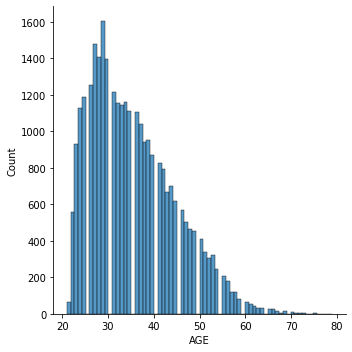

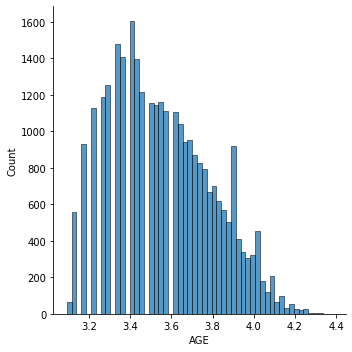

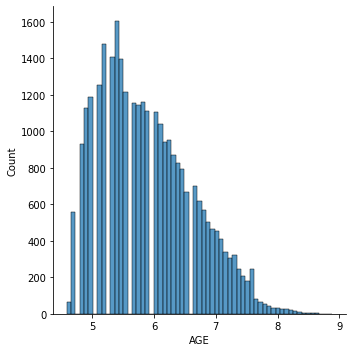

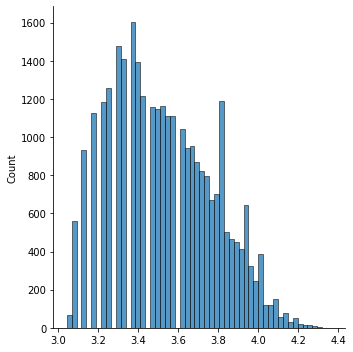

In [32]:
plot_transformations('AGE')

None of the transformations have good effect on the data distribution, so we will leave AGE as it is

<Figure size 1080x720 with 0 Axes>

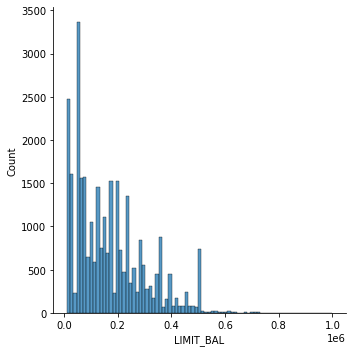

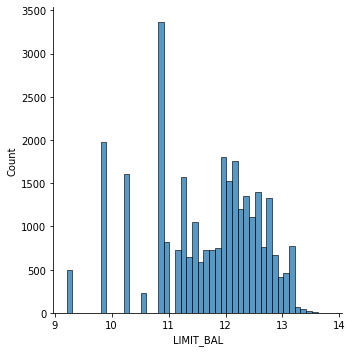

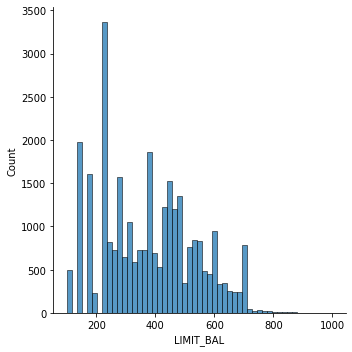

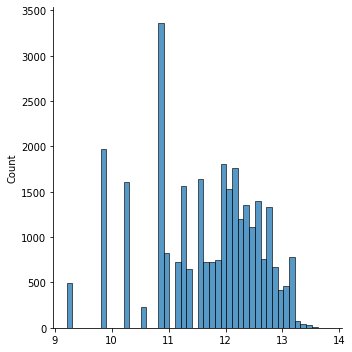

In [33]:
plot_transformations('LIMIT_BAL')

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Boxcox transformation not applicable since there are negative values present in data


<Figure size 1080x720 with 0 Axes>

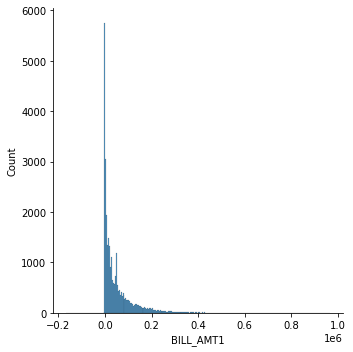

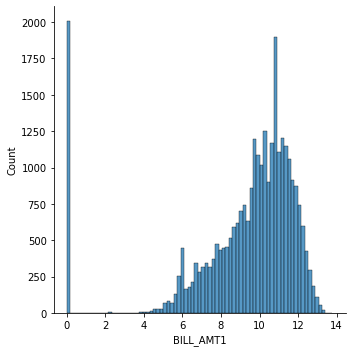

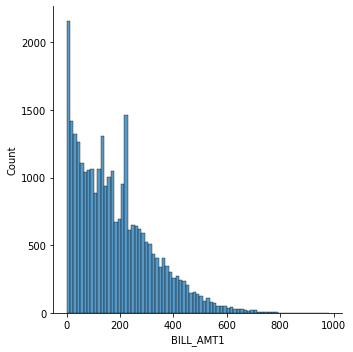

In [34]:
plot_transformations('BILL_AMT1')

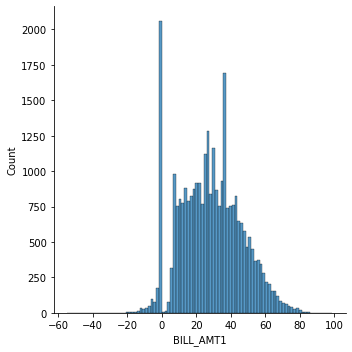

In [35]:
bill_amt = np.cbrt(df['BILL_AMT1'])
sns.displot(bill_amt)

There are negative values present in the data, so applying cuberoot transformation makes sense. While the transformation doesnt make the data completely normal, the data is now well distributed and centered with a little left skew

Boxcox transformation not applicable since there are negative values present in data


<Figure size 1080x720 with 0 Axes>

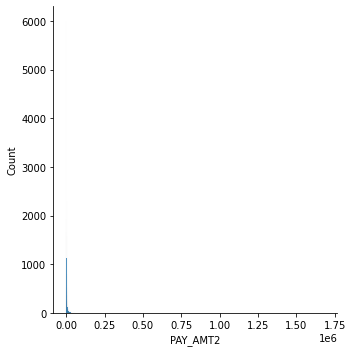

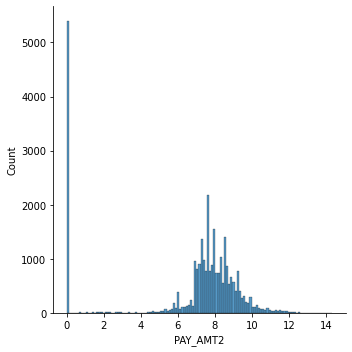

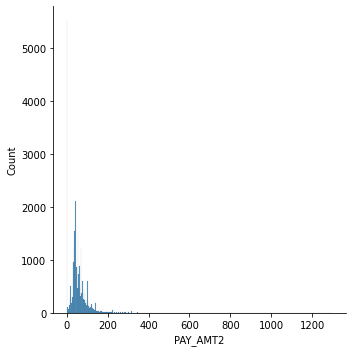

In [36]:
plot_transformations('PAY_AMT2')

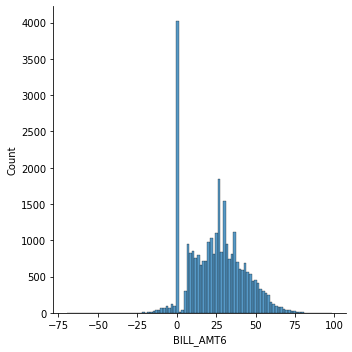

In [37]:
pay_amt = np.cbrt(df['BILL_AMT6'])
sns.displot(pay_amt)

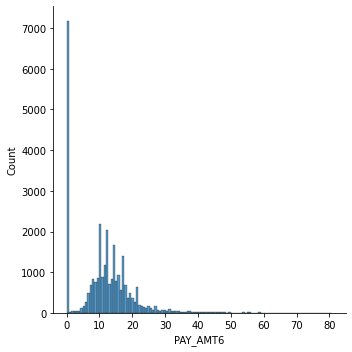

In [38]:
pay_amt = np.cbrt(df['PAY_AMT6'])
sns.displot(pay_amt)

For Pay amount too, cuberoot transformation works well, so we will be applying cuberoot transformation to both Bill Amt and Pay Amt

We can see various outliers in the data, so data transformation is not working well, so we will be applying the transformation to the dataset where outliers were removed

In [39]:
X_train_cp = X_train.copy()
X_test_cp = X_test.copy()

In [40]:
#Applying cuberoot transformation
X_train[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']] = np.cbrt(X_train[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
#Applying cuberoot transformation
X_test[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']] = np.cbrt(X_test[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])

In [41]:
X_train[['PAY_AMT1','PAY_AMT2',
         'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]=np.cbrt(X_train[['PAY_AMT1','PAY_AMT2',
         'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])
X_test[['PAY_AMT1','PAY_AMT2',
         'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]=np.cbrt(X_test[['PAY_AMT1','PAY_AMT2',
         'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced',max_depth=6)
dtc.fit(X_train, y_train)
print_metrics(dtc)

Train Accuracy =  0.7884705882352941
Test Accuracy =  0.7917777777777778

Test classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3505
           1       0.53      0.52      0.53       995

    accuracy                           0.79      4500
   macro avg       0.70      0.70      0.70      4500
weighted avg       0.79      0.79      0.79      4500



The data transformation has no effect on the decision tree model performance, but for Logistic regression, the model performance falls to 0
Now we will be looking at feature importance, look at the features deemed important by the model and maybe removing the feature considered not important by the model

># Feature Importance

In [43]:
coef = lr.coef_[0]
idx_sorted = np.argsort(coef)[::-1]
for i in idx_sorted:
    print(X_train.columns[i], " : ", coef[i])

AGE  :  0.013899132635686061
PAY_2_2  :  0.0005157930810188973
PAY_0_2  :  0.00049418752170854
PAY_3_2  :  0.0004364606213117106
PAY_4_2  :  0.0003639241206525479
PAY_5_2  :  0.0003231700077302767
PAY_6_2  :  0.000303178630523221
MARRIAGE_1  :  0.00025191896546750467
EDUCATION_2  :  0.0002163847955511124
PAY_0_1  :  0.00020648930886057817
SEX  :  0.0001157255879504105
EDUCATION_3  :  0.00010869597416128247
MARRIAGE_2  :  0.00010078454075772982
PAY_0_3  :  6.94609706428749e-05
PAY_6_-2  :  6.362993772350072e-05
PAY_5_-2  :  5.671073623552469e-05
EDUCATION_1  :  5.630411378430628e-05
PAY_2_3  :  4.9834301321312625e-05
PAY_4_-2  :  4.7029510508635094e-05
PAY_3_-2  :  3.635403508023859e-05
PAY_3_3  :  3.119587105959712e-05
PAY_2_-2  :  3.0703013346787475e-05
PAY_4_3  :  2.679041776421207e-05
PAY_5_3  :  2.607696882044742e-05
PAY_6_3  :  2.4897102864157122e-05
PAY_5_7  :  1.5278880808314315e-05
PAY_4_7  :  1.5272876771152695e-05
PAY_0_4  :  1.2428610365629485e-05
PAY_6_7  :  1.1756854964698

In [44]:
feat_imp = dtc.feature_importances_
idx = np.argsort(feat_imp)[::-1]
for i in idx:
    print(X_train.columns[i], " : ", feat_imp[i])

PAY_0_2  :  0.4905329900513912
PAY_2_2  :  0.20234569592570323
PAY_AMT2  :  0.11587684366480808
PAY_4_2  :  0.04045854143512845
LIMIT_BAL  :  0.03019170396747399
PAY_2_3  :  0.028023716469253012
PAY_AMT4  :  0.020118650366807395
BILL_AMT1  :  0.014384191446963445
PAY_0_3  :  0.011561754520582706
PAY_6_-2  :  0.009646105756970667
PAY_0_1  :  0.008310590397911502
PAY_5_2  :  0.00567194040201499
PAY_AMT5  :  0.005184105728794719
AGE  :  0.002695652722629239
PAY_AMT6  :  0.0022240358113600803
BILL_AMT3  :  0.0019000864065400608
BILL_AMT6  :  0.001863756813834194
PAY_4_0  :  0.0017791676066237438
BILL_AMT4  :  0.0015536911163494713
PAY_AMT3  :  0.001550636114989437
BILL_AMT2  :  0.001444206936315451
PAY_6_0  :  0.0011582629259759148
SEX  :  0.0008935716076751296
MARRIAGE_3  :  0.0006301018039039424
EDUCATION_2  :  0.0
PAY_0_5  :  0.0
PAY_2_1  :  0.0
PAY_2_0  :  0.0
PAY_2_-2  :  0.0
PAY_0_8  :  0.0
PAY_0_7  :  0.0
PAY_0_6  :  0.0
PAY_AMT1  :  0.0
PAY_0_4  :  0.0
PAY_2_4  :  0.0
BILL_AMT5  : 

**Inference**

From the above scores, we can see : Pay flags, Pay Amount, Limit Balance, Bill Amount, Age, are important for the model to predict, while SEX, MARRIAGE, EDUCATION seems not to be that important

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

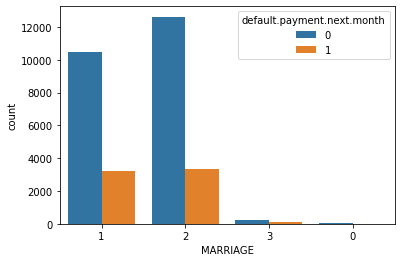

In [45]:
sns.countplot(x = 'MARRIAGE', data = df, hue = 'default.payment.next.month')

<AxesSubplot:xlabel='SEX', ylabel='count'>

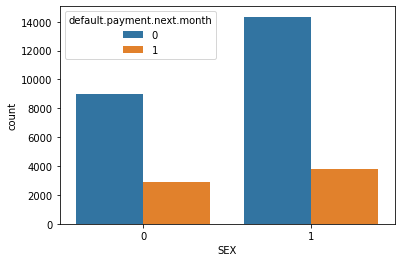

In [46]:
sns.countplot(x = 'SEX', data = df, hue = 'default.payment.next.month')

<AxesSubplot:xlabel='SEX', ylabel='count'>

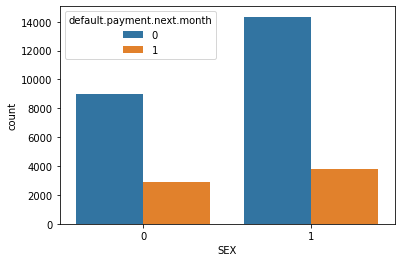

In [47]:
sns.countplot(x = 'SEX', data = df, hue = 'default.payment.next.month')

**Inference**

So we can see from the above visualization as well as from the model feature importance, SEX, MARRIAGE are not relevant in predicting the target. But eduction does makes sense as higher the education, better is the job and chances of paying back the credit card bill.

So we will be removing SEX and MARRIAGE for now, and come back to education

In [48]:
X_train = X_train_cp.copy()
X_test = X_test_cp.copy()

In [49]:
remove_vars = [i for i in X_train.columns if i.startswith('MARRIAGE')]
remove_vars.append('SEX')
X_train.drop(remove_vars, axis = 1, inplace = True)
X_test.drop(remove_vars, axis=1, inplace = True)

In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=1500)                        # Since we have imbalance in the dataset
lr.fit(X_train.values, y_train)
print_metrics(lr)

Train Accuracy =  0.5546666666666666
Test Accuracy =  0.5628888888888889

Test classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.52      0.65      3505
           1       0.30      0.72      0.42       995

    accuracy                           0.56      4500
   macro avg       0.58      0.62      0.54      4500
weighted avg       0.74      0.56      0.60      4500



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced',max_depth=6)
dtc.fit(X_train, y_train)
print_metrics(dtc)

Train Accuracy =  0.7881176470588235
Test Accuracy =  0.7917777777777778

Test classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3505
           1       0.53      0.52      0.53       995

    accuracy                           0.79      4500
   macro avg       0.70      0.70      0.70      4500
weighted avg       0.79      0.79      0.79      4500



**Inference**
Even after dropping SEX and MARRIAGE, there is no change in metrics. So we can say the variables were not influencing the prediction

In [52]:
feat_imp = dtc.feature_importances_
idx = np.argsort(feat_imp)[::-1]
for i in idx:
    print(X_train.columns[i], " : ", feat_imp[i])

PAY_0_2  :  0.4912517491311362
PAY_2_2  :  0.20264218527347824
PAY_AMT2  :  0.11468094767121365
PAY_4_2  :  0.04051782377592564
LIMIT_BAL  :  0.030235942707374584
PAY_2_3  :  0.02806477854064656
PAY_AMT4  :  0.02014812944960026
BILL_AMT1  :  0.015519449945539552
PAY_0_3  :  0.011578695513759651
PAY_6_-2  :  0.009660239823868695
PAY_0_1  :  0.008322767585644902
PAY_AMT5  :  0.005850197920909102
PAY_5_2  :  0.005680251277631395
AGE  :  0.004835097453843005
PAY_AMT6  :  0.002227294605294545
PAY_AMT3  :  0.0020109691612684435
BILL_AMT3  :  0.001902870529899972
PAY_4_0  :  0.0017817745523285903
BILL_AMT2  :  0.001446323077063164
BILL_AMT4  :  0.001003335144505621
BILL_AMT6  :  0.000639176859068264
PAY_0_6  :  0.0
PAY_2_4  :  0.0
PAY_2_1  :  0.0
PAY_2_0  :  0.0
PAY_2_-2  :  0.0
PAY_0_8  :  0.0
PAY_0_7  :  0.0
EDUCATION_3  :  0.0
PAY_0_5  :  0.0
PAY_0_4  :  0.0
PAY_0_0  :  0.0
PAY_0_-2  :  0.0
PAY_2_6  :  0.0
EDUCATION_2  :  0.0
EDUCATION_1  :  0.0
PAY_AMT1  :  0.0
BILL_AMT5  :  0.0
PAY_2_5  

># Scaling the features.

Since the features are not in the same scale, it might cause the model to assign unequal weights to the features. For ex: Limit_bal and Pay_0 have very different scales. So we will scale the features using standard scalar, which will bring all the variables to same scale having mean 0 and std-dev 1.

Again scaling will benefit the logistic regression model, but wont have much effect on Decision trees

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc =  ss.fit_transform(X_test)

In [54]:
from sklearn.metrics import accuracy_score, classification_report 
def print_metrics_sc(model):
    """This function will print the Scaled train and test accuracy, and the Test classification report"""
    y_train_pred = model.predict(X_train_sc)
    y_test_pred = model.predict(X_test_sc)
    print('Train Accuracy = ', accuracy_score(y_train, y_train_pred))
    print('Test Accuracy = ', accuracy_score(y_test, y_test_pred))
    print()
    print('Test classification Report: ')
    print()
    print(classification_report(y_test, y_test_pred))

In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')                        # Since we have imbalance in the dataset
lr.fit(X_train_sc, y_train)
print_metrics_sc(lr)

Train Accuracy =  0.7783529411764706
Test Accuracy =  0.7837777777777778

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3505
           1       0.51      0.58      0.54       995

    accuracy                           0.78      4500
   macro avg       0.69      0.71      0.70      4500
weighted avg       0.80      0.78      0.79      4500



**Inference** We can see sudden increase in the f1-score for logistic regression since regression works well when the features are on same scale

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced',max_depth=6)
dtc.fit(X_train_sc, y_train)
print_metrics_sc(dtc)

Train Accuracy =  0.7881176470588235
Test Accuracy =  0.7868888888888889

Test classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3505
           1       0.52      0.50      0.51       995

    accuracy                           0.79      4500
   macro avg       0.69      0.68      0.69      4500
weighted avg       0.78      0.79      0.79      4500



**Inference**
There is not much change in Decision Trees as they do not much affected by the scale of the features. But we can see immediate increase in the f1-score of logistic regression, which is very much affected by the scale 

># Hyperparameter tuning Logistic regression & Decision Trees

In [57]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [58]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr = LogisticRegression(max_iter = 1500, class_weight='balanced')
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='f1')
grid_result = grid_search.fit(X_train_sc, y_train)

In [59]:
lr_best = grid_search.best_estimator_
print_metrics_sc(lr_best)

Train Accuracy =  0.779607843137255
Test Accuracy =  0.7853333333333333

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3505
           1       0.51      0.58      0.54       995

    accuracy                           0.79      4500
   macro avg       0.69      0.71      0.70      4500
weighted avg       0.80      0.79      0.79      4500



In [60]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [61]:
params = {
    'max_depth': [2, 3, 4, 5, 6, 10, 12, 15],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dtc = DecisionTreeClassifier(class_weight='balanced')
grid_search_dt = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "f1")
grid_search_dt.fit(X_train, y_train)

Fitting 15 folds for each of 80 candidates, totalling 1200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10, 12, 15],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1', verbose=1)

In [62]:
grid_search_dt.best_score_

0.5108501722331399

In [63]:
dtc_best = grid_search_dt.best_estimator_
print_metrics(dtc_best)

Train Accuracy =  0.783843137254902
Test Accuracy =  0.7902222222222223

Test classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3505
           1       0.53      0.53      0.53       995

    accuracy                           0.79      4500
   macro avg       0.70      0.70      0.70      4500
weighted avg       0.79      0.79      0.79      4500



># Trying advance algorithms

1. Random Forest (Bagging algo)
2. XGBoost (Boosting algo)


In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, class_weight='balanced')
rfc.fit(X_train, y_train)
print_metrics(rfc)

Train Accuracy =  0.7763921568627451
Test Accuracy =  0.7806666666666666

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      3505
           1       0.50      0.61      0.55       995

    accuracy                           0.78      4500
   macro avg       0.69      0.72      0.70      4500
weighted avg       0.80      0.78      0.79      4500



In [65]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth = 6, scale_pos_weight= 3)
xgbc.fit(X_train.values, y_train)
print_metrics(xgbc)

Train Accuracy =  0.866313725490196
Test Accuracy =  0.7835555555555556

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3505
           1       0.51      0.58      0.54       995

    accuracy                           0.78      4500
   macro avg       0.69      0.71      0.70      4500
weighted avg       0.79      0.78      0.79      4500



**Inference**
So we get the best f1-score for positive class using XGBoost classifier, and also good accuracy while prediction. So we will be selecting this model moving forward

<AxesSubplot:>

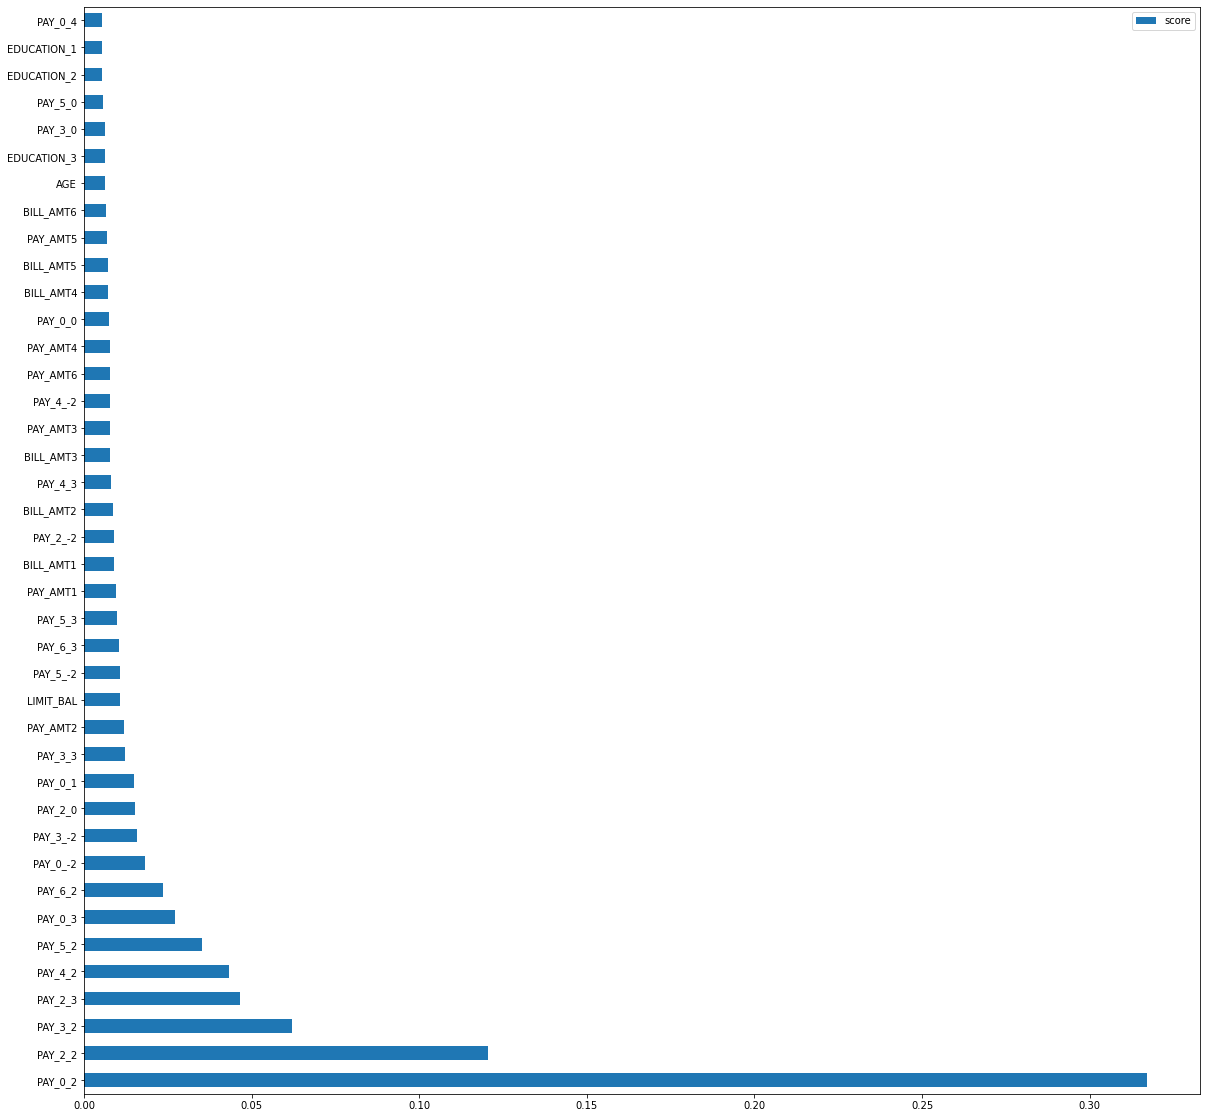

In [82]:
#feature_imp = xgbc.get_booster().get_score(importance_type='weight')
feature_imp = xgbc.feature_importances_
keys = X_train.columns
values = feature_imp

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
top_40 = data.head(40)
top_40.plot(kind='barh', figsize = (20,20)) ## plot top 40 features

In [83]:
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'scale_pos_weight' : [2, 2.5, 3]
}

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)

xgbc = XGBClassifier()
gs2 = GridSearchCV(xgbc, params, n_jobs=-1, cv=cv, scoring='f1', verbose = 2)
gs2.fit(X_train.values, y_train)

print('Best score:', gs2.best_score_)
print('Best params:', gs2.best_params_)

Fitting 2 folds for each of 324 candidates, totalling 648 fits
[CV] END booster=gbtree, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0.5, scale_pos_weight=2; total time=  11.9s
[CV] END booster=gbtree, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=0.5, scale_pos_weight=3; total time=  11.3s
[CV] END booster=gbtree, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=3; total time=  11.3s
[CV] END booster=gbtree, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=5, scale_pos_weight=2.5; total time=  11.7s
[CV] END booster=gbtree, learning_rate=0.01, n_estimators=100, reg_alpha=0, reg_lambda=5, scale_pos_weight=3; total time=  11.3s
[CV] END booster=gbtree, learning_rate=0.01, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=3; total time=  11.4s
[CV] END booster=gbtree, learning_rate=0.01, n_estimators=100, reg_alpha=0.5, reg_lambda=1, scale_pos_weight=2; total time=  11.2s
[CV] END booster=gbtre

In [84]:
xgbc_best = gs2.best_estimator_
print_metrics(xgbc_best)

Train Accuracy =  0.8014509803921569
Test Accuracy =  0.7935555555555556

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      3505
           1       0.53      0.59      0.56       995

    accuracy                           0.79      4500
   macro avg       0.70      0.72      0.71      4500
weighted avg       0.80      0.79      0.80      4500



># Imbalance Handling

Imbalance in dataset will have negative effect on the model, where the model will overfit on the majority class and fail to give good results for minority class.

There are various ways to handle class imbalance. We will be trying 2 methods:

1. Random Oversampling -  In this method, the minority class will be sampled with replacement till the number of samples for both minority and majority classes become same.
   
2. SMOTE - Here, synthetic copies of the minority class instance will be produced using K nearest neighbors classifiers


In [85]:
# Random Over Sampling:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_train_resampled, y_train_resampled= ros.fit_resample(X_train, y_train)

In [86]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(booster =  'gbtree', 
                     learning_rate =  0.01, n_estimators =  200, reg_alpha= 0.5,
                     reg_lambda= 5)                                 # We removed the extra weight on positive class
xgbc.fit(X_train_resampled, y_train_resampled)
print_metrics(xgbc)

Train Accuracy =  0.7786274509803922
Test Accuracy =  0.7735555555555556

Test classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3505
           1       0.49      0.62      0.55       995

    accuracy                           0.77      4500
   macro avg       0.69      0.72      0.70      4500
weighted avg       0.80      0.77      0.78      4500



In [88]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_resampled, y_train_resampled= smote.fit_resample(X_train, y_train)

In [89]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(booster =  'gbtree', 
                     learning_rate =  0.01, n_estimators =  200, reg_alpha= 0.5,
                     reg_lambda= 5)
xgbc.fit(X_train_resampled, y_train_resampled)
print_metrics(xgbc)

Train Accuracy =  0.8160392156862745
Test Accuracy =  0.8157777777777778

Test classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3505
           1       0.64      0.38      0.48       995

    accuracy                           0.82      4500
   macro avg       0.74      0.66      0.68      4500
weighted avg       0.80      0.82      0.80      4500


[CV] END booster=gblinear, learning_rate=0.05, n_estimators=200, reg_alpha=0.5, reg_lambda=5, scale_pos_weight=3; total time=   2.7s
[CV] END booster=gblinear, learning_rate=0.05, n_estimators=200, reg_alpha=1, reg_lambda=0.5, scale_pos_weight=2.5; total time=   2.7s
[CV] END booster=gblinear, learning_rate=0.05, n_estimators=200, reg_alpha=1, reg_lambda=1, scale_pos_weight=2; total time=   3.1s
[CV] END booster=gblinear, learning_rate=0.05, n_estimators=200, reg_alpha=1, reg_lambda=1, scale_pos_weight=3; total time=   3.0s
[CV] END booster=gblinear, learning_ra

SMOTE reduced the f1 score for minority,but incresed test accuracy.

># Final Model.
After comparing with all the models, we can conclude that XGBoost classifier gives the best results.

Train Accuracy =  0.7659945832079447
Test Accuracy =  0.760654619843164

Test classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2176
           1       0.53      0.63      0.57       757

    accuracy                           0.76      2933
   macro avg       0.70      0.72      0.70      2933
weighted avg       0.78      0.76      0.77      2933

So we will be using XGBoost classifier with the foll params:
'booster': 'gbtree', 'learning_rate': 0.01,
'n_estimators': 200, 'reg_alpha': 0.5,
'reg_lambda': 5, 'scale_pos_weight': 3

The columns to be considered:
LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'

The foll transformations to be applied:
cuberoot transformation to all BILL_AMT and PAY_AMT columns

The foll columns need to be one hot encoded : Pay flags 0-6

After all the above process was done, for training the model, we randomly sampled the minority class and were able to get final f1-score of 0.57